In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import pandas as pd
import os

In [2]:
from test_utils import prepare_images_pths

In [3]:
base_pth = "./CroppedYale"
subjects_imgs_pth, subjects_imgs_names = prepare_images_pths(base_pth)    


In [4]:
# list of lists of subject imgs
import shutil
unique_subject = []
for folder in subjects_imgs_names:
    unique_subject.append(folder[1])
    unique_subject.append(folder[2])
    unique_subject.append(folder[10])
    unique_subject.append(folder[15])
    unique_subject.append(folder[20])
    unique_subject.append(folder[25])
    unique_subject.append(folder[50])

unique_imgs_pth = []
for name in unique_subject:
    folder_name = name.split("_")[0]
    unique_imgs_pth.append(f"{folder_name}/{name}")

for i in range(len(unique_imgs_pth)):
    shutil.copy(f"{base_pth}/{unique_imgs_pth[i]}", f"unique_faces/")
    
        

In [5]:
subjects_imgs = os.listdir("./unique_faces")
len(subjects_imgs)

# 228 img 6 for each subject 38x6
recognition_pgms = []
for img in subjects_imgs:
        pgm = plt.imread(f"./unique_faces/{img}")
        recognition_pgms.append(pgm)
        
m = 192
n = 168 
recognition_pgms_arr = np.array(recognition_pgms) #, dtype=object
recognition_pgms_vectors = []
for img in recognition_pgms_arr:
    img_flat = img.flatten()
    recognition_pgms_vectors.append(img_flat)

recognition_pgms_vectors = np.array(recognition_pgms_vectors) #, dtype=object        


(192, 168)


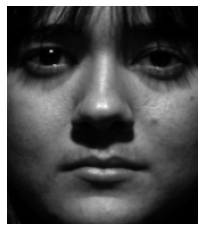

In [6]:
# testing_pgms_arr# X = training_pgms_vectors >> reshape and vector to (192,168)
rand_int = np.random.randint(0,len(recognition_pgms_arr))
img_reshaped = recognition_pgms_vectors[rand_int].reshape(m,n)
print(img_reshaped.shape)
plt.figure(figsize=(4., 4.))
plt.axis('off')   
plt.imshow(img_reshaped, plt.cm.gray)
plt.show()    


In [7]:
avg_face = np.loadtxt('avg_face.txt', dtype=int) #(32256,)

vector_list shape (266, 32256)
vector_list.T shape (32256, 266)
X_recognition shape (32256, 266)


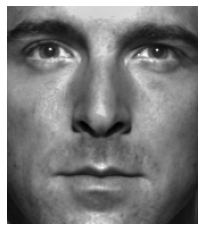

In [8]:
# Turn to numppy array of lists
vectors_list = []
for vector in recognition_pgms_vectors:
    vectors_list.append(vector.tolist())

# n_imgs x (nxm)
print("vector_list shape",np.array(vectors_list).shape)  

# (nxm) x k
vectors_list =  np.array(vectors_list).T 
print("vector_list.T shape",np.array(vectors_list).shape)   

# copy avg face n times
avg_face_list  = []
for i in range(len(vectors_list[1])):
    avg_face_list.append(avg_face.tolist())

avg_face_list =  np.array(avg_face_list).T

    
X_recognition = vectors_list - avg_face_list
print("X_recognition shape",X_recognition.shape)

# X = training_pgms_vectors >> reshape and vector to (192,168)
rand_int = np.random.randint(0,len(recognition_pgms_arr))
img_reshaped = X_recognition.T[rand_int].reshape(m,n)
plt.figure(figsize=(4., 4.))
plt.axis('off')   
plt.imshow(img_reshaped, plt.cm.gray)
plt.show()    


In [9]:

U = np.loadtxt('U.txt')

In [10]:
from test_utils import get_roc_data_recognition
from sklearn.metrics import classification_report

In [11]:
y_test, yfit = get_roc_data_recognition(U, X_recognition, 5,50,data_shape=(len(unique_imgs_pth),7))

print(classification_report(y_test, yfit))

c:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       0.40      1.00      0.57         2
           8       0.00      0.00      0.00         2
           9       0.67      0.67      0.67         3
          10       1.00      0.50      0.67         2
          13       1.00      0.67      0.80         3
          15       1.00      0.33      0.50         3
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.75      1.00      0.86         3
          19       0.67      0.67      0.67         3
          20       1.00      1.00      1.00         1
          21       1.00    

c:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

In [12]:
y_test, yfit = get_roc_data_recognition(U, X_recognition, 5,300,data_shape=(len(unique_imgs_pth),7))
print(classification_report(y_test, yfit))

c:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.40      1.00      0.57         2
           8       0.00      0.00      0.00         2
           9       0.67      0.67      0.67         3
          10       0.20      0.50      0.29         2
          13       1.00      0.67      0.80         3
          15       1.00      0.33      0.50         3
          16       0.00      0.00      0.00         1
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         3
          19       1.00      0.67      0.80         3
          20       1.00      1.00      1.00         1
          21       1.00    

c:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mohamed Abdelaziz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from test_utils import get_df_dataframes, plot_roc_multiclass


X, y = get_df_dataframes(U,X_recognition, 5,300, data_shape=(len(unique_imgs_pth),7))

persons_classes = [i for i in range(1,39)]
# Binarize the output
y = label_binarize(y, classes=persons_classes)
n_classes = y.shape[1]

# # shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=40))
y_pred = classifier.fit(X_train, y_train).decision_function(X_test)



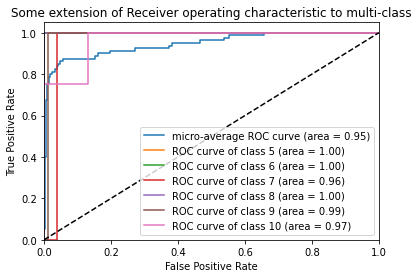

In [14]:
plot_roc_multiclass(y_test, y_pred, start=5, end=10)

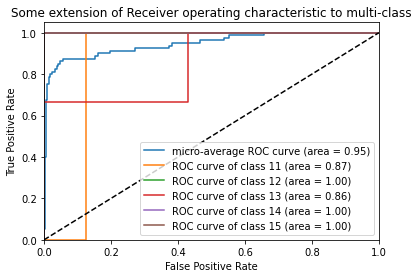

In [18]:
plot_roc_multiclass(y_test, y_pred, start=11, end=15)

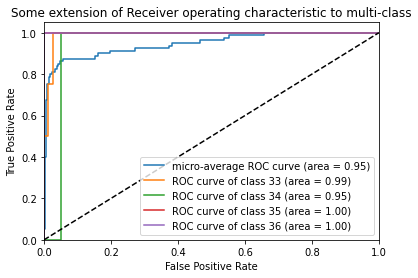

In [16]:
plot_roc_multiclass(y_test, y_pred, start=33, end=36)